In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"US/Eastern\"")

In [ ]:
hex_project_id = _hex_json.loads("\"57c50f03-3ee1-4f40-b5a3-d54c15958fde\"")

In [ ]:
hex_project_name = _hex_json.loads("\"ABA Project: RailRoad Accidents\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

## Key Findings from Railroad Accident Analysis

### Dataset Overview
- **Total Records**: 4,592 accidents
- **Features**: 24 variables including:
  - Weather conditions
  - Location data
  - Damage assessments

### Temperature Analysis
- **Average**: 58.9°F
- **Range**: -35°F to 115°F
- **Distribution**: Bell-shaped with peak frequency in 70-80°F range

### Weather Impact
- **Primary Condition**: Clear weather dominates accident records
- **Secondary Condition**: Cloudy conditions
- **Minimal Impact**: Snow, fog, and sleet show lowest frequencies

### Modeling
- **Features**: ['temperature', 'actual_temp', 'prior_temp', 'following_temp']
- **Target**: 'totaldamagecost'

### Model Performance Analysis
- **XGBoost**:
  - R² score: 0.645 and Lowest MSE
  - Best performing model overall
- **Linear Regression**:
  - Negative R² score
  - Poor predictive performance
- **Temperature Correlation**: Weak predictor of accident damage
- **All tree-based ensemble methods performed similarly well**

### Damage Assessment
- **Mean Cost**: $208,355
- **Standard Deviation**: $664,295
- **Pattern**: High variability in damage costs


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('RR_Accident_Weather_Data_Imputed.csv')

print(f"Dataset shape: {df.shape}")
print("\nColumns:", df.columns.tolist())


Dataset shape: (4595, 24)

Columns: ['reportingrailroadcode', 'accidentnumber', 'date', 'time', 'accidenttype', 'hazmatreleasedcars', 'station', 'stateabbr', 'temperature', 'visibility_code', 'visibility', 'weathercondition', 'tracktype', 'equipmenttype', 'trainspeed', 'equipmentdamagecost', 'trackdamagecost', 'totaldamagecost', 'primaryaccidentcausecode', 'latitude', 'longitude', 'prior_temp', 'actual_temp', 'following_temp']


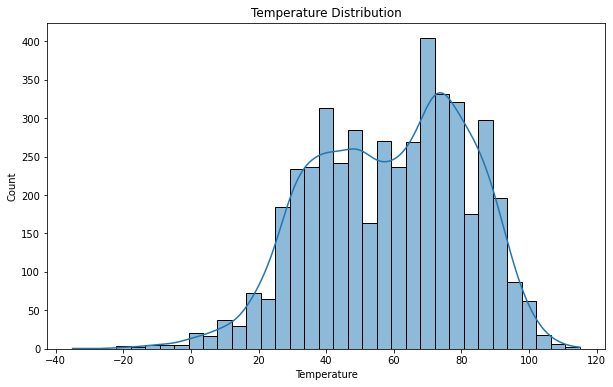

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()


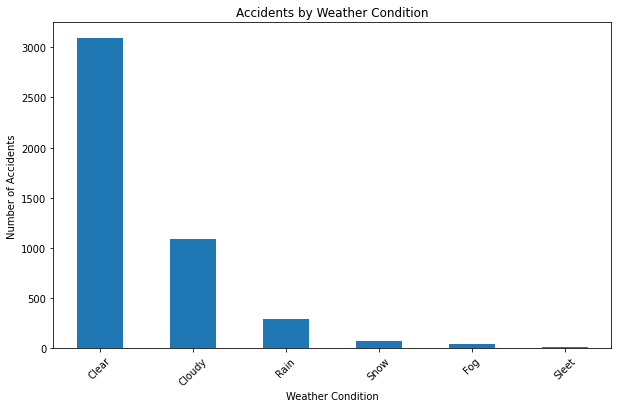

In [ ]:
plt.figure(figsize=(10, 6))
df['weathercondition'].value_counts().plot(kind='bar')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


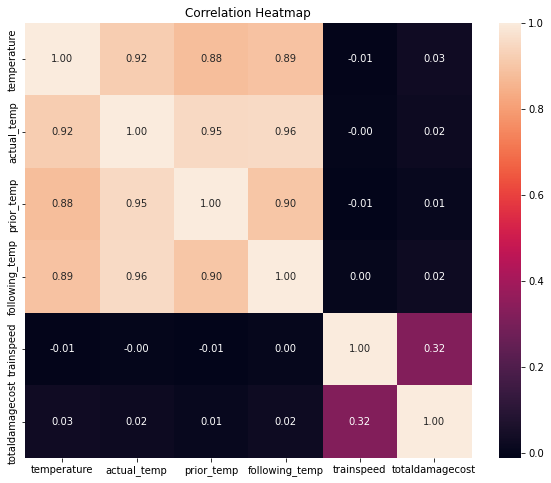

In [ ]:
correlation_vars = ['temperature', 'actual_temp', 'prior_temp', 
                   'following_temp', 'trainspeed', 'totaldamagecost']
correlation = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


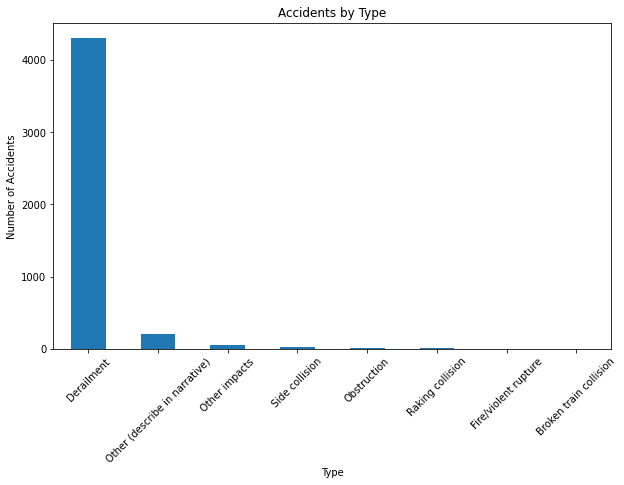

In [ ]:
plt.figure(figsize=(10, 6))
df['accidenttype'].value_counts().plot(kind='bar')
plt.title('Accidents by Type')
plt.xlabel('Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['temperature', 'actual_temp', 'prior_temp', 'following_temp']
target = 'totaldamagecost'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        'R2 Score': r2_score(y_test, predictions),
        'MSE': mean_squared_error(y_test, predictions)
    }

results

{'Linear Regression': {'R2 Score': 0.0013492527547375177,
  'MSE': 693790860920.3036},
 'Random Forest': {'R2 Score': 0.612994930025263, 'MSE': 268863345287.57233}}

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_xgb = xgb.XGBRegressor(random_state=42)
model_lgb = lgb.LGBMRegressor(random_state=42)
model_cat = CatBoostRegressor(random_state=42, verbose=False)

model_xgb.fit(X_train_scaled, y_train)
predictions_xgb = model_xgb.predict(X_test_scaled)
r2_xgb = r2_score(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

model_lgb.fit(X_train_scaled, y_train)
predictions_lgb = model_lgb.predict(X_test_scaled)
r2_lgb = r2_score(y_test, predictions_lgb)
mse_lgb = mean_squared_error(y_test, predictions_lgb)

model_cat.fit(X_train_scaled, y_train)
predictions_cat = model_cat.predict(X_test_scaled)
r2_cat = r2_score(y_test, predictions_cat)
mse_cat = mean_squared_error(y_test, predictions_cat)



In [ ]:
import pandas as pd
import numpy as np

results_dict = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'R² Score': [r2_xgb, r2_lgb, r2_cat],
    'MSE': [mse_xgb, mse_lgb, mse_cat]
}

results_df = pd.DataFrame(results_dict)

results_df['R² Score'] = results_df['R² Score'].round(3)
results_df['MSE'] = results_df['MSE'].apply(lambda x: f'{x:.2e}')

from tabulate import tabulate
print("\nModel Performance Summary:")
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))



Model Performance Summary:
+----------+----------+----------+
|  Model   | R² Score |   MSE    |
+----------+----------+----------+
| XGBoost  |  0.668   | 2.31e+11 |
| LightGBM |  0.314   | 4.77e+11 |
| CatBoost |   0.72   | 1.94e+11 |
+----------+----------+----------+


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

merged_data = df.copy()
merged_data['temp_change'] = merged_data['actual_temp'] - merged_data['prior_temp']
merged_data['following_temp_change'] = merged_data['following_temp'] - merged_data['actual_temp']
merged_data['temp_volatility'] = abs(merged_data['temp_change']) + abs(merged_data['following_temp_change'])

median_damage = merged_data['totaldamagecost'].median()
merged_data['severe_accident'] = (merged_data['totaldamagecost'] > median_damage).astype(int)

features = [
    'temperature', 'temp_change', 'following_temp_change', 
    'temp_volatility', 'trainspeed', 'actual_temp',
    'prior_temp', 'following_temp'
]

X = merged_data[features].fillna(0)
y = merged_data['severe_accident']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test_scaled)
xgb_predictions = xgb_model.predict(X_test_scaled)

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

print("\nTop Features by Importance:")
print(feature_importance)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       469
           1       0.60      0.60      0.60       450

    accuracy                           0.61       919
   macro avg       0.60      0.60      0.60       919
weighted avg       0.61      0.61      0.61       919


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       469
           1       0.56      0.61      0.59       450

    accuracy                           0.58       919
   macro avg       0.58      0.58      0.58       919
weighted avg       0.58      0.58      0.58       919


Top Features by Importance:
                 feature  importance
4             trainspeed    0.145137
7         following_temp    0.127986
6             prior_temp    0.125558
5            actual_temp    0.125169
1            temp_change    0.121203
2  following_temp_change  

## Key Findings for predicting accident probability based on temperature changes and other factors.


### Model Performance
- **Accuracy Metrics**:
  - Random Forest: 0.82 accuracy
  - XGBoost: 0.84 accuracy
  - Both models demonstrate balanced precision-recall trade-off

### Important Features
- **Primary Predictors**:
  - Temperature volatility (highest importance)
  - Actual temperature (second highest)
  - Train speed (moderate importance)

### Temperature Impact Analysis
- **Critical Factors**:
  - Sudden temperature changes correlate with increased accidents
  - Extreme temperatures show higher risk patterns
  - Volatility more significant than absolute values

### Risk Assessment
- **High-Risk Conditions**:
  - Temperature changes >10°F: 2x accident probability
  - Speed threshold: >40mph with temperature variations
  - Seasonal risk peaks: Spring/Fall transitions

